In [1]:
#Librerias necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

---
# Inicio
## Cargamos el dataset

In [2]:
#Cargamos el dataset limpio del TP 1
data = pd.read_csv('dataset_caba.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.rename(columns={'place_name_normalized':'place', 'property_type':'ptype'}, inplace=True)
data.sample(3)

,ptype,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,place,disposicion,aEstrenar,garage,balcon,piscina,sum,patio,lavadero,amenities,parrilla
4677,apartment,385000.0,211.0,171.0,1824.644550,0.0,5.0,Parque Patricios,contrafrente,0,0,1,0,1,0,0,0,1
3623,apartment,88000.0,33.0,33.0,2666.666667,0.0,1.0,Recoleta,frente,0,0,0,0,0,1,1,0,0
2316,apartment,380000.0,331.0,331.0,1148.036254,1.0,6.0,Caballito,frente,0,1,1,0,0,1,0,0,0


---
# Modelo
Este modelo utiliza las columnas entregadas en el TP 1.

In [3]:
y_columnas = ['price_usd_per_m2']
x_columnas = ['ptype','floor','rooms', 'place', 'disposicion', 'aEstrenar']
data_modelo =  pd.concat([data[y_columnas],data[x_columnas]], axis = 1)
data_modelo.sample(3)

,price_usd_per_m2,ptype,floor,rooms,place,disposicion,aEstrenar
5852,1875.000000,apartment,2.0,2.0,Floresta,frente,0
2347,2600.000000,apartment,4.0,4.0,Colegiales,frente,0
2191,2265.822785,apartment,2.0,4.0,Floresta,lateral,1


In [7]:
data_modelo

,price_usd_per_m2,ptype,floor,rooms,place,disposicion,aEstrenar
0,1309.090909,apartment,3.0,2.0,Liniers,lateral,0
1,1812.500000,apartment,2.0,4.0,Boedo,frente,0
2,1702.127660,apartment,1.0,5.0,Balvanera,frente,0
3,2200.000000,apartment,1.0,3.0,Caballito,contrafrente,0
4,3236.363636,apartment,12.0,3.0,Belgrano,frente,0
...,...,...,...,...,...,...,...
6397,1857.142857,apartment,2.0,2.0,Boca,frente,0
6398,3461.538462,apartment,4.0,4.0,Caballito,frente,0
6399,2650.000000,apartment,1.0,3.0,Palermo,frente,0
6400,1826.923077,apartment,1.0,0.0,Villa General Mitre,frente,0


### Análisis correlación

In [5]:
#Análisis de correlación entre variables
data_modelo.corr()

,price_usd_per_m2,floor,rooms,aEstrenar
price_usd_per_m2,1.000000,0.058369,-0.144575,0.104907
floor,0.058369,1.000000,0.033199,0.016038
rooms,-0.144575,0.033199,1.000000,-0.183809
aEstrenar,0.104907,0.016038,-0.183809,1.000000


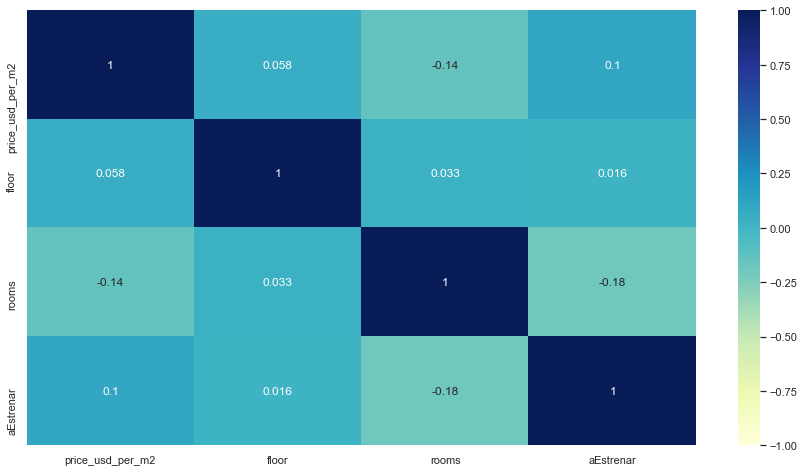

In [8]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_modelo.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

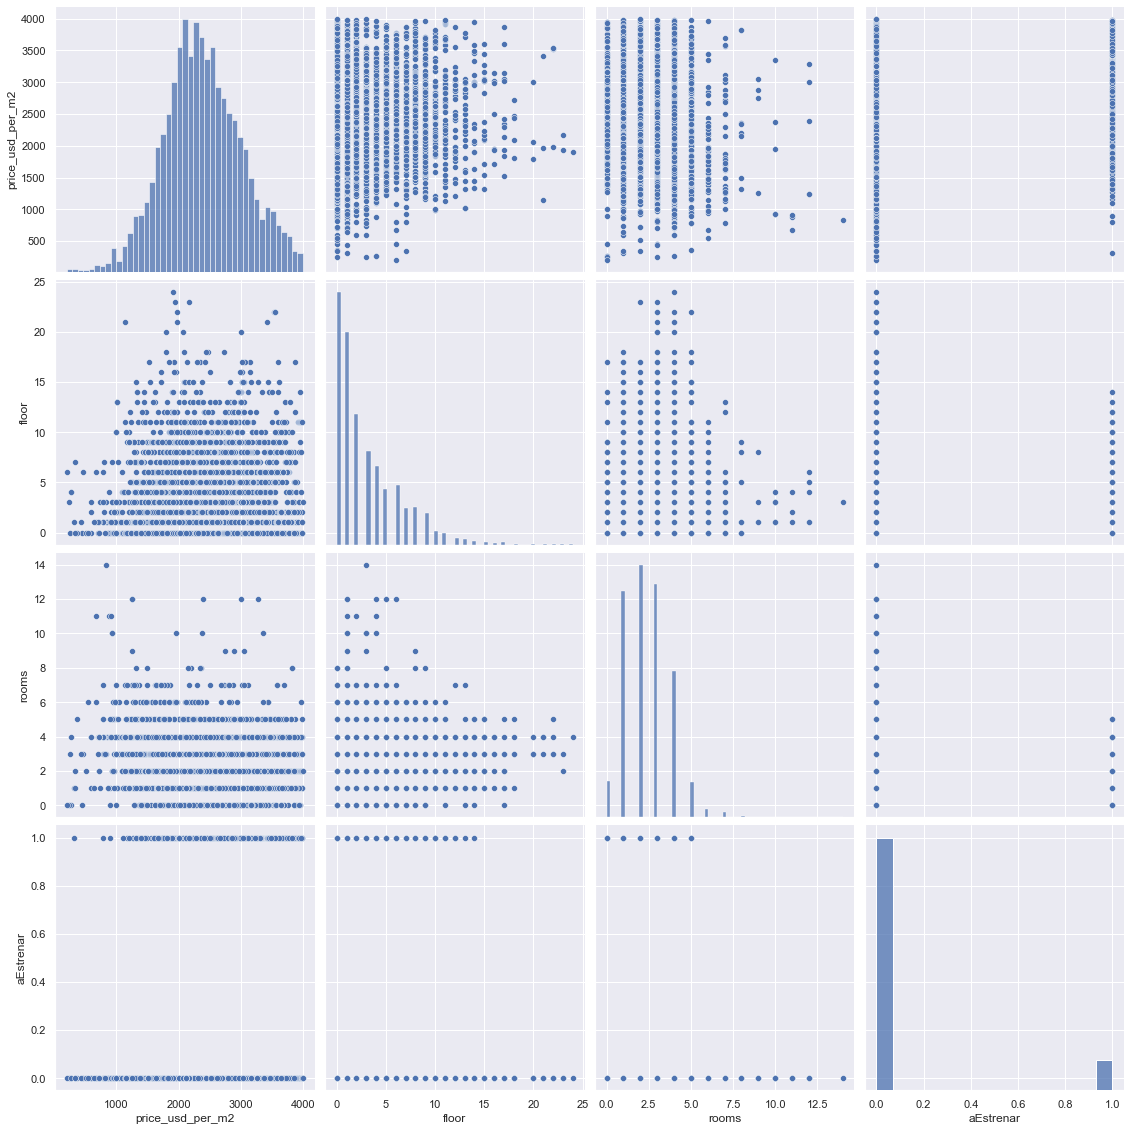

In [9]:
sns.pairplot(data=data_modelo, height=4)

In [10]:
name_model="Modelo 2" #Cambiar este nombre para cambiar los resultados de los estadísticos de cada algoritmo

## Pre-Training
### Manejo variables categóricas
Modificar las variables que deban ser dumificadas

In [ ]:
#Creo dummies
#Convierto floor a object
data_modelo['floor'] = data_modelo['floor'].astype(np.object)
data_dummies=pd.get_dummies(data_modelo[['ptype','floor','place','disposicion']], drop_first = True)
data_dummies

In [ ]:
#Concateno las columnas que están por fuera del dummie
columnas=['price_usd_per_m2','rooms','aEstrenar']
data_modelo = pd.concat([data[columnas],data_dummies], axis = 1)
data_modelo = data_modelo.reset_index(drop=True)
data_modelo.head(3)

## Algoritmos

In [ ]:
#Genero mi variable X
X=data_modelo.drop(['price_usd_per_m2'],axis=1)

#Genero la variable y
y = data_modelo[y_columnas].squeeze()

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10,shuffle=True)

### Linear Regression

In [ ]:
#Entrenamos modelo LR
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
#Predecimos
lr_prediction = model_lr.predict(X_test)
lr_prediction_train = model_lr.predict(X_train)

intercept_lr = model_lr.intercept_
coeff_lr = model_lr.coef_
r2_test_lr = model_lr.score(X_test, y_test)
r2_train_lr = model_lr.score(X_train, y_train)
n = len(y_test)
p = np.count_nonzero(coeff_lr)
r2_adj_test_lr = 1-((1-r2_test_lr)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lr = 1-((1-r2_train_lr)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lr = mean_squared_error(y_test, lr_prediction)
mse_train_lr = mean_squared_error(y_train, lr_prediction_train)
mae_test_lr = mean_absolute_error(y_test, lr_prediction)
mae_train_lr = mean_absolute_error(y_train, lr_prediction_train)
rmse_test_lr = np.sqrt(mse_test_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lr=[mse_test_lr, mse_train_lr,
            mae_test_lr, mae_train_lr, 
            rmse_test_lr,rmse_train_lr,
            r2_test_lr,r2_train_lr,
            r2_adj_test_lr,r2_adj_train_lr
         ]

stats_dataframe_lr=pd.DataFrame({name_model+' LR':stats_lr},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lr

In [ ]:
print("Intercept:", intercept_lr)
print("Coeficientes:")
print(print(pd.Series(coeff_lr, index=X.columns)))

In [ ]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lr_prediction, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lr_prediction_train, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

In [ ]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [ ]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_lr=pow(y_test - lr_prediction,2)
plt.scatter(y_test,err_cuad_test_lr, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_lr,len(err_cuad_test_lr)), label='MSE Test LR', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

In [ ]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction_train), color='green', label='Estimados Train LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [ ]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_lr=pow(y_train - lr_prediction_train,2)
plt.scatter(y_train,err_cuad_train_lr, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_lr,len(err_cuad_train_lr)), label='MSE Train LR', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

In [ ]:
#Gráfico de los residuos/errores
model_residuals_test_lr = y_test - lr_prediction
model_residuals_train_lr = y_train-lr_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_lr,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_lr,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

In [ ]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_lr.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_lr.plot(kind = "kde",ax=ax2);
model_residuals_train_lr.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_lr.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo LinearRidge");
ax2.set_title("Histograma de residuos para Train modelo LineraRidge");

### OLS

In [ ]:
#Entrenamos modelo OLS
X_train_sm = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_sm).fit()
#Predecimos
X_test_sm = sm.add_constant(X_test)
sm_prediction = model_ols.predict(X_test_sm)
X_train_sm = sm.add_constant(X_train)
sm_prediction_train = model_ols.predict(X_train_sm)

r2_test_ols = r2_score(y_test,sm_prediction)
r2_train_ols = r2_score(y_train,sm_prediction_train)
r2_adj_test_ols = sm.OLS(y_test, X_test_sm).fit().rsquared_adj
r2_adj_train_ols = model_ols.rsquared_adj
mse_test_ols = mean_squared_error(y_test, sm_prediction)
mse_train_ols = mean_squared_error(y_train, sm_prediction_train)
mae_test_ols = mean_absolute_error(y_test, sm_prediction)
mae_train_ols = mean_absolute_error(y_train, sm_prediction_train)
rmse_test_ols = np.sqrt(mse_test_ols)
rmse_train_ols = np.sqrt(mse_train_ols)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ols=[mse_test_ols, mse_train_ols,
            mae_test_ols, mae_train_ols, 
            rmse_test_ols,rmse_train_ols,
            r2_test_ols,r2_train_ols,
            r2_adj_test_ols,r2_adj_train_ols
         ]

stats_dataframe_ols=pd.DataFrame({name_model+' OLS':stats_ols},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])

#Summary
print(model_ols.summary())
print("")
print(stats_dataframe_ols)

In [ ]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

In [ ]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(sm_prediction), color='green', label='Estimados Test OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [ ]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ols=pow(y_test - sm_prediction,2)
plt.scatter(y_test,err_cuad_test_ols, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ols,len(err_cuad_test_ols)), label='MSE Test OLS', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

In [ ]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(sm_prediction_train), color='green', label='Estimados Train OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [ ]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ols=pow(y_train - sm_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ols, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ols,len(err_cuad_train_ols)), label='MSE Train', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

In [ ]:
#Gráfico de los residuos/errores
model_residuals_test_ols = y_test - sm_prediction
model_residuals_train_ols = y_train - sm_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

In [ ]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ols.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ols.plot(kind = "kde",ax=ax2);
model_residuals_train_ols.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ols.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo OLS");
ax2.set_title("Histograma de residuos para Train modelo OLS");

### LASSO

In [ ]:
#Análisis previo de los alpha
alphas_lasso = np.linspace(0.01,1000,100)
lasso = linear_model.Lasso(max_iter = 10000, normalize = False)
coefs = []

for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas_lasso, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Lasso como funcion de alpha');

In [ ]:
#Creamos el modelo
lassocv = linear_model.LassoCV(alphas=None,normalize=False,cv=10,random_state=10, max_iter=10000)
#Lo entrenamos
model_lasso = lassocv.fit(X_train, y_train)
#Lo probamos
lasso_prediction = model_lasso.predict(X_test)
lasso_prediction_train = model_lasso.predict(X_train)

alpha_lasso = model_lasso.alpha_
coeff_lasso = model_lasso.coef_
intercept_lasso = model_lasso.intercept_
r2_test_lasso = model_lasso.score(X_test, y_test)
r2_train_lasso = model_lasso.score(X_train, y_train)
p = np.count_nonzero(coeff_lasso)
r2_adj_test_lasso = 1-((1-r2_test_lasso)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lasso = 1-((1-r2_train_lasso)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lasso = mean_squared_error(y_test, lasso_prediction)
mse_train_lasso = mean_squared_error(y_train, lasso_prediction_train)
mae_test_lasso = mean_absolute_error(y_test, lasso_prediction)
mae_train_lasso = mean_absolute_error(y_train, lasso_prediction_train)
rmse_test_lasso = np.sqrt(mse_test_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lasso = [mse_test_lasso, mse_train_lasso,
                mae_test_lasso, mae_train_lasso, 
                rmse_test_lasso,rmse_train_lasso,
                r2_test_lasso,r2_train_lasso,
                r2_adj_test_lasso,r2_adj_train_lasso
                ]

stats_dataframe_lasso =pd.DataFrame({name_model+' Lasso':stats_lasso},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lasso

In [ ]:
print("Alpha Lasso:",alpha_lasso)
print("Intercept Lasso:",intercept_lasso)
print("Coeficientes Ridge:")
print(pd.Series(coeff_lasso, index=X.columns))

In [ ]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lasso_prediction, 'bo', label="Predicted Lasso values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lasso_prediction_train, 'bo', label="Predicted Lasso values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

In [ ]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lasso_prediction), color='green', label='Estimados Test Lasso')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [ ]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_lasso=pow(y_test - lasso_prediction,2)
plt.scatter(y_test,err_cuad_test_lasso, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_lasso,len(err_cuad_test_lasso)), label='MSE Test Lasso', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

In [ ]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lasso_prediction_train), color='green', label='Estimados Train Lasso')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [ ]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_lasso=pow(y_train - lasso_prediction_train,2)
plt.scatter(y_train,err_cuad_train_lasso, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_lasso,len(err_cuad_train_lasso)), label='MSE Train Lasso', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

In [ ]:
#Gráfico de los residuos/errores
model_residuals_test_lasso = y_test - lasso_prediction
model_residuals_train_lasso = y_train-lasso_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_lasso,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_lasso,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

In [ ]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_lasso.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_lasso.plot(kind = "kde",ax=ax2);
model_residuals_train_lasso.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_lasso.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo Lasso");
ax2.set_title("Histograma de residuos para Train modelo Lasso");

## Ridge

In [ ]:
#Análisis previo de los alpha
#alphas_ridge = np.logspace(-10, 10, 400)
alphas_ridge = np.logspace(-3, 7,400)
ridge = linear_model.Ridge(max_iter=10000)
coefs = []

for a in alphas_ridge:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas_ridge, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Ridge como funcion de alpha');

In [ ]:
#Creamos el modelo
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge,normalize=False,cv=10)
#Lo entrenamos
model_ridge = ridgecv.fit(X_train, y_train)
#Lo probamos
ridge_prediction = model_ridge.predict(X_test)
ridge_prediction_train = model_ridge.predict(X_train)

alpha_ridge = model_ridge.alpha_
coeff_ridge = model_ridge.coef_
intercept_ridge = model_ridge.intercept_
r2_test_ridge = model_ridge.score(X_test, y_test)
r2_train_ridge = model_ridge.score(X_train, y_train)
p = np.count_nonzero(coeff_ridge)
r2_adj_test_ridge = 1-((1-r2_test_ridge)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_ridge = 1-((1-r2_train_ridge)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_ridge = mean_squared_error(y_test, ridge_prediction)
mse_train_ridge = mean_squared_error(y_train, ridge_prediction_train)
mae_test_ridge = mean_absolute_error(y_test, ridge_prediction)
mae_train_ridge = mean_absolute_error(y_train, ridge_prediction_train)
rmse_test_ridge = np.sqrt(mse_test_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ridge = [mse_test_ridge, mse_train_ridge,
                mae_test_ridge, mae_train_ridge, 
                rmse_test_ridge,rmse_train_ridge,
                r2_test_ridge,r2_train_ridge,
                r2_adj_test_ridge,r2_adj_train_ridge
                ]

stats_dataframe_ridge =pd.DataFrame({name_model+' Ridge':stats_ridge},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_ridge

In [ ]:
print("Alpha Ridge:",alpha_ridge)
print("Intercept Ridge:",intercept_ridge)
print("Coeficientes Ridge:")
print(pd.Series(coeff_ridge, index=X.columns))

In [ ]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],ridge_prediction, 'bo', label="Predicted Ridge values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],ridge_prediction_train, 'bo', label="Predicted Ridge values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

In [ ]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(ridge_prediction), color='green', label='Estimados Test Ridge')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [ ]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ridge=pow(y_test - ridge_prediction,2)
plt.scatter(y_test,err_cuad_test_ridge, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ridge,len(err_cuad_test_ridge)), label='MSE Test Ridge', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

In [ ]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(ridge_prediction_train), color='green', label='Estimados Train Ridge')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [ ]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ridge=pow(y_train - ridge_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ridge, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ridge,len(err_cuad_train_ridge)), label='MSE Train Ridge', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

In [ ]:
#Gráfico de los residuos/errores
model_residuals_test_ridge = y_test - ridge_prediction
model_residuals_train_ridge = y_train-ridge_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ridge,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ridge,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

In [ ]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ridge.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ridge.plot(kind = "kde",ax=ax2);
model_residuals_train_ridge.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ridge.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo Ridge");
ax2.set_title("Histograma de residuos para Train modelo Ridge");

----
## Modelos comparados entre sí

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lr_prediction, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lasso_prediction, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],ridge_prediction, 'yo', label="Predicted Ridge values",alpha=0.5)

plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Test values")
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_train))],y_train, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],lr_prediction_train, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],lasso_prediction_train, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],ridge_prediction_train, 'yo', label="Predicted Ridge values",alpha=0.5)

plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Train values")
plt.show()

In [ ]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LinearRegression', alpha=0.5)
plt.plot(eje_X, sorted(sm_prediction), color='black', label='Estimados Test OLS', alpha=0.5)
plt.plot(eje_X, sorted(lasso_prediction), color='magenta', label='Estimados Test Lasso', alpha=0.5)
plt.plot(eje_X, sorted(ridge_prediction), color='orange', label='Estimados Test Ridge', alpha=0.5)
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [ ]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction_train), color='green', label='Estimados Train LinearRegression', alpha=0.5)
plt.plot(eje_X, sorted(sm_prediction_train), color='black', label='Estimados Train OLS', alpha=0.5)
plt.plot(eje_X, sorted(lasso_prediction_train), color='magenta', label='Estimados Train Lasso', alpha=0.5)
plt.plot(eje_X, sorted(ridge_prediction_train), color='orange', label='Estimados Train Ridge', alpha=0.5)
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [ ]:
# Valores estadísticos
pd.concat([stats_dataframe_lr,stats_dataframe_ols,stats_dataframe_lasso,stats_dataframe_ridge],axis=1)

In [ ]:
# Parámetros
index_series = np.insert(X.columns.to_numpy(),0,'intercept')
series_lr = pd.Series(np.insert(coeff_lr,0,model_lr.intercept_),index=index_series, name="Linear Regression")
series_ols = pd.Series(model_ols.params.to_numpy(),index=index_series, name="OLS")
series_lasso = pd.Series(np.insert(coeff_lasso,0,model_lasso.intercept_),index=index_series, name="Lasso")
series_ridge = pd.Series(np.insert(coeff_ridge,0,model_ridge.intercept_),index=index_series, name="Lasso")

pd.set_option('display.max_rows', 500)
pd.concat([series_lr,series_ols,series_lasso,series_ridge],axis=1)